# Quickstart

In this short quickstart, we will demonstrate the basics of using the **Copulas** library to generate a synthetic dataset.

## 1. Load the data

We'll start by loading a built-in dataset from the `copulas.datasets` module.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from copulas.datasets import sample_trivariate_xyz

data = sample_trivariate_xyz()
data.head()

,x,y,z
0,9.004177e-05,2.883992e-06,0.638689
1,8.819273e-01,2.911979e-07,1.058121
2,5.003865e-01,4.886504e-04,0.372506
3,1.838544e-12,5.392802e-02,0.687370
4,1.627915e-01,1.634269e-08,-0.881068


We can visualize this dataset using a 3D scatter plot.

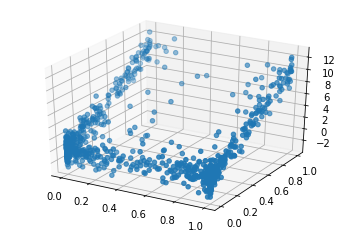

In [3]:
from copulas.visualization import scatter_3d

scatter_3d(data)

## 2. Create a Copula instance

Next, we need to import Copulas and create an instance of the `GaussianMultivariate` class with the default arguments. This will allow us to model this dataset using a Gaussian copula where the marginal distributions will be automatically estimated.

In [4]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()

## 3. Fit the model

Once we have a `GaussianMultivariate` instance, we can call the `fit` method with `data`. This will estimate the marginal and joint distributions, allowing us to model the dataset.

In [5]:
copula.fit(data)

## 4. Sample new data

Once the model has been fitted, we are ready to generate new samples by calling the `sample` method of the `Copulas` instance and specifying the number of data points we want to sample.

In [6]:
num_samples = 1000

synthetic_data = copula.sample(num_samples)
synthetic_data.head()

,x,y,z
0,0.077890,0.805750,4.296428
1,0.999998,0.042082,1.390855
2,1.000000,0.000030,1.937162
3,0.766690,0.094306,1.763867
4,1.000000,0.307102,2.270254


The returned object, `synthetic_data`, is a `pandas.DataFrame` containing a table of synthetic data with the same format as the input data and 1000 rows as we requested. We can plot the synthetic data and visually compare it to the real data.

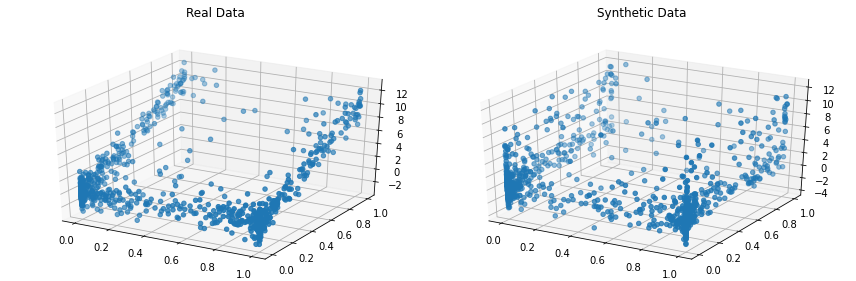

In [7]:
from copulas.visualization import compare_3d

compare_3d(data, synthetic_data)

## 5. Load and save a model

For some copula models the fitting process can take a lot of time, so we probably would like to
avoid having to fit every we want to generate samples. Instead we can fit a model once, save it,
and load it every time we want to sample new data.

If we have a fitted model, we can save it by calling it's `save` method, that only takes
as argument the path where the model will be stored. Similarly, the `load` allows to load
a model stored on disk by passing as argument the path where the model is stored.

In [8]:
model_path = 'mymodel.pkl'
copula.save(model_path)

Once the model is saved, it can be loaded back as a **Copulas** instance by using the `load`
method. Note that you need to load it using the same class that was used to save it.

In [9]:
new_copula = GaussianMultivariate.load(model_path)

At this point we could use this model instance to generate more samples.

In [10]:
new_samples = new_copula.sample(num_samples)

## 6. Extract and set parameters

In some cases it's more useful to obtain the parameters from a fitted copula than to save and load from disk. Once our copula is fitted, we can extract it's parameters using the `to_dict` method:

In [11]:
copula_params = copula.to_dict()

This will return a dictionary containing all the copula parameters: Once we have all the parameters we can create a new identical **Copula** instance by using the method `from_dict`:

In [12]:
new_copula = GaussianMultivariate.from_dict(copula_params)

At this point we could use this model instance to generate more samples.

In [13]:
new_samples = new_copula.sample(num_samples)